### FONCTIONNE AVEC ENTETES MAUVAISE

In [70]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd

url = 'https://www.emploi-territorial.fr/emploi-mobilite/?adv-search=data'

# Créer une liste pour stocker les informations de chaque offre
data = []

# Fonction pour traiter le texte et supprimer les balises <br>
def process_text(text_div):
    if text_div:
        # Utiliser .stripped_strings pour obtenir une liste de chaînes de caractères non vides
        text_list = list(text_div.stripped_strings)
        # Concaténer les chaînes avec un espace
        return ' '.join(text_list)
    return None

# Envoyer une requête GET à l'URL
response = requests.get(url)

# Vérifier si la requête a réussi (statut 200)
if response.status_code == 200:
    # Utiliser BeautifulSoup pour parser le contenu HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Trouver toutes les balises 'a' avec la classe 'lien-details-offre'
    offres_links = soup.find_all('a', class_='lien-details-offre')

    # Concaténer le domaine de base avec chaque lien
    base_url = 'https://www.emploi-territorial.fr'
    offres_full_links = [urljoin(base_url, offre_link['href']) for offre_link in offres_links]

    # Afficher les textes des offres et les liens correspondants
    for offre_full_link in offres_full_links:

        # Effectuer du web scraping sur la nouvelle page
        offre_response = requests.get(offre_full_link)
        if offre_response.status_code == 200:
            offre_soup = BeautifulSoup(offre_response.text, 'html.parser')

            # Exemple : Extraire les informations sous forme de tableau
            info_table = {}
            offre_items = offre_soup.find_all('div', class_='offre-item')
            for offre_item in offre_items:
                label = offre_item.find('div', class_='offre-item-label')
                value = offre_item.find('div', class_='offre-item-value')
                if label and value:
                    info_table[label.text.strip()] = process_text(value)

            # Exemple : Extraire le texte de toutes les balises 'offre-item-text'
            offre_text_divs = offre_soup.find_all('div', class_='offre-item-text')
            for i, offre_text_div in enumerate(offre_text_divs):
                info_table[f'Texte de l\'offre {i+1}'] = process_text(offre_text_div)

            # Ajouter les informations de l'offre à la liste
            data.append(info_table)

        else:
            print(f'Erreur lors de la requête pour l\'offre ({offre_response.status_code})')

    # Créer un DataFrame à partir de la liste d'informations
    df = pd.DataFrame(data)

else:
    print(f'Erreur lors de la requête ({response.status_code})')


In [60]:
df.head(1)

,Employeur,Lieu de travail,Poste à pourvoir le,Date limite de candidature,Type d'emploi,Nombre de postes,Famille de métiers,Grade(s) recherché(s),Métier(s),Ouvert aux contractuels,...,Texte de l'offre 1,Texte de l'offre 2,Texte de l'offre 3,Texte de l'offre 4,Texte de l'offre 5,Site web de l'employeur,Contact,Texte de l'offre 6,Durée de la mission,Experience souhaitée
0,CONSEIL REGIONAL OCCITANIE Hôtel de Région de ...,TOULOUSE,01/03/2024,11/01/2024,Emploi permanent - vacance d'emploi,1,Informatique et système d'information >\n ...,Ingénieur Ingénieur principal,Chargé ou chargée de support et services des s...,Oui\n ...,...,La Direction de l'Information et du Numérique ...,VOS MISSIONS PRINCIPALES : En tant que Chef.fe...,Vous avez une bonne connaissance du contexte d...,Les candidatures (toutes les pièces composant ...,Conformément au principe d'égalité d'accès à l...,NaN,NaN,NaN,NaN,NaN


In [71]:
import openpyxl

df.to_excel('offres2.xlsx', engine='openpyxl', index=False)

Lien complet de l'offre: https://www.emploi-territorial.fr/offre/o034231101271164-chef-fe-projets-ingenierie-data
[<div class="offre-item row p-2">
<div class="offre-item-label col-4 font-weight-bold">Employeur
                                                            <div class="col-logo"></div>
</div>
<div class="offre-item-value col-8">
<strong>
<a data-tooltip="Voir toutes les offres de cette collectivité" href="/emploi-mobilite/?search-col=16344" title="Voir toutes les offres de cette collectivité">CONSEIL REGIONAL OCCITANIE </a>
</strong>
<br/>Hôtel de Région de Montpellier, 201 avenue de la Pompignane<br/>34064 MONTPELLIER
                                                    </div>
</div>, <div class="offre-item row p-2">
<div class="offre-item-label col-12 col-sm-4 font-weight-bold">Lieu de travail</div>
<div class="offre-item-value col-12 col-sm-8">TOULOUSE</div>
</div>, <div class="offre-item row p-2">
<div class="offre-item-label col-12 col-sm-4 font-weight-bold">Poste à po
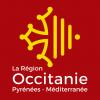
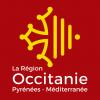

KeyError: 0

In [64]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd

url = 'https://www.emploi-territorial.fr/emploi-mobilite/?adv-search=data'

# Créer une liste pour stocker les informations de chaque offre
data = []

# Fonction pour traiter le texte et supprimer les balises <br>
def process_text(text_div):
    if text_div:
        # Utiliser .stripped_strings pour obtenir une liste de chaînes de caractères non vides
        text_list = list(text_div.stripped_strings)
        # Concaténer les chaînes avec un espace
        return ' '.join(text_list)
    return None

# Envoyer une requête GET à l'URL
response = requests.get(url)

# Vérifier si la requête a réussi (statut 200)
if response.status_code == 200:
    # Utiliser BeautifulSoup pour parser le contenu HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Trouver toutes les balises 'a' avec la classe 'lien-details-offre'
    offres_links = soup.find_all('a', class_='lien-details-offre')

    # Concaténer le domaine de base avec chaque lien
    base_url = 'https://www.emploi-territorial.fr'
    offres_full_links = [urljoin(base_url, offre_link['href']) for offre_link in offres_links]

    # Afficher les textes des offres et les liens correspondants
    for offre_full_link in offres_full_links:
        print(f'Lien complet de l\'offre: {offre_full_link}')

        # Effectuer du web scraping sur la nouvelle page
        offre_response = requests.get(offre_full_link)
        if offre_response.status_code == 200:
            offre_soup = BeautifulSoup(offre_response.text, 'html.parser')

            # Exemple : Extraire les informations sous forme de tableau
            info_table = {}
            offre_items = offre_soup.find_all('div', class_='offre-item')
            print(offre_items)
            offre_label = offre_soup.find_all('div', class_='offre-item-label')
            
            for i in range(0, len(offre_items), 1):
                label = offre_items[i].find('div', class_='offre-item-label')
                print('texte',label)
                value = process_text(offre_text_div[i])
                print('value',value)
                if label :
                    # Utiliser le texte de la balise 'offre-item-label' comme clé
                    key = process_text(label)
                    print(key)
                    # Utiliser la clé pour stocker la valeur de 'offre-item-text'
                    info_table[key] = process_text(value)

            # Ajouter les informations de l'offre à la liste
            data.append(info_table)

        else:
            print(f'Erreur lors de la requête pour l\'offre ({offre_response.status_code})')

    # Créer un DataFrame à partir de la liste d'informations
    df = pd.DataFrame(data)

    # Afficher le DataFrame
    print(df)

else:
    print(f'Erreur lors de la requête ({response.status_code})')
